                                                                                                        Samantha Gregoryk
                                                                                                        CPTS 215 
                                                                                                        Section 
                                                                                                        September 15th, 2019
# MA2


## Amortized Loans

### Description

From [Wikipedia](https://en.wikipedia.org/wiki/Amortizing_loan):

An amortized loan is a loan where the principal of the loan is paid down over the life a loan (that is, amortized) according to an amortization schedule. Each payment to the lender will consist of a portion of interest and a portion of principal. Mortgage loans are typically amortizing loans. The calculations for  an amortizing loan are those of an annuity using the time value of money formulas, and can be done using an amortization calculator. 

The following example is for a loan for a Tesla Model S

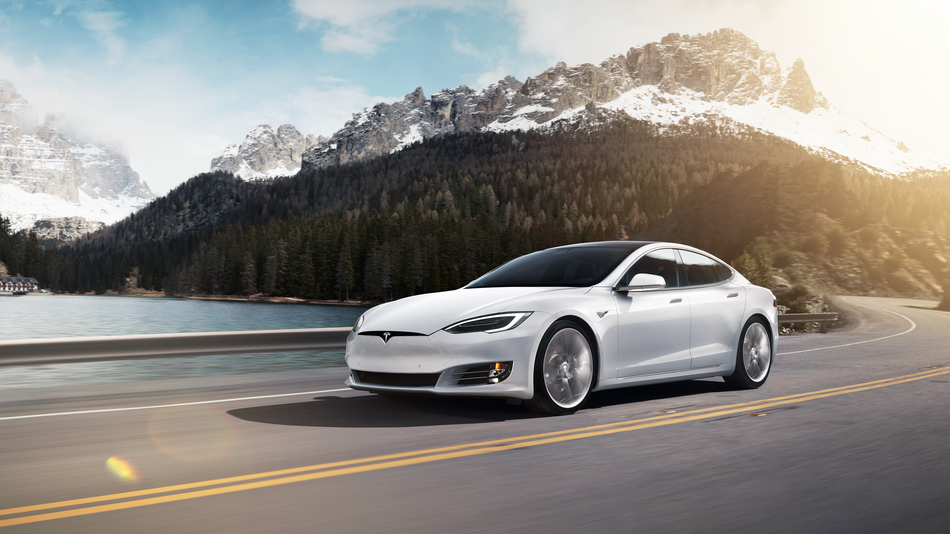

(Image from https://mashable.com/article/tesla-model-x-s-range-charging-upgrade/)

Tesla has a loan estimator on their website. [Try it](https://www.tesla.com/support/affordability-calculator) to check your work!

### Relevant Formulas

###### _Monthly Payment Calculation_

$$mpymt = \frac{r(P)}{1-(1+r)^{-n}}$$

                                                     r = monthly interest rate  
                                                     P = principal cost of the car   
                                                     n = number of monthly payments   

##### _Remaining Loan Balance_

$$balance = P(1+r)^{n} - mpymt \frac{r(P)}{1-(1+r)^{-n}}$$

                                                    r = monthly interest rate  
                                                    P = principal cost of the car   
                                                    n = number of monthly payments   

#### _Payment Amount Per Period_

$$amount = P\frac{r(1+r)^{-n}}{(1+r)^{n}-1}$$

                                                    r = monthly interest rate  
                                                    P = principal cost of the car   
                                                    n = number of monthly payments   

### User Interaction

In [156]:
user_input = input('What is the loan for? ')
principal = input("Please enter the principal amount for loan: ")
principal = float(principal)
remaining = principal

yearly_interest_rate = input('Please enter the yearly interest rate (as a percent) for the loan: ')
yearly_interest_rate = float(yearly_interest_rate) / 100 /12

years = input('Please enter the number of years for the loan: ')
years = float(years) * 12 

What is the loan for? 
Please enter the principal amount for loan: 1001
Please enter the yearly interest rate (as a percent) for the loan: 1
Please enter the number of years for the loan: 1


In [157]:
def total_loan_amount(principal, yearly_interest_rate):
    total_loan = principal + (principal * (yearly_interest_rate * 12))
    return total_loan

def monthly_payment_amount(principal, yearly_interest_rate, years):
    payment = (yearly_interest_rate * principal) / ( 1 - (1 + yearly_interest_rate)**(-years))
    return payment

def monthly_interest_amount(remaining, yearly_interest_rate):
    interest = float(yearly_interest_rate * remaining) 
    return interest 

def monthly_principal(principal, monthly_payment, monthly_interest):
    m_principal = monthly_payment - monthly_interest
    return m_principal

def remaining_balance(remaining, monthly_payment):
    balance = remaining - monthly_payment
    return balance

### Calculation Output


In [158]:
print("Monthly Payment: $%.2f" % (monthly_payment_amount(principal, yearly_interest_rate, years)))

print("Total Loan Amount: $%.2f" % (total_loan_amount(principal, yearly_interest_rate)))

print("Total Interest Paid: $%.2f" % (total_loan_amount(principal, yearly_interest_rate) - principal))

Monthly Payment: $83.87
Total Loan Amount: $1011.01
Total Interest Paid: $10.01


Month  Balance      Principal     Interest     Payment 
0      $-1086.54    $84.70      $-0.83      $83.87
(0, -1086.5382254397994)
(0, 84.70405877291775)
(0, -0.8348618055557347)
1      $-1171.31    $84.77      $-0.91      $83.87
(1, -1171.3128709283612)
(1, 84.77464548856184)
(1, -0.9054485211998329)
2      $-1256.16    $84.85      $-0.98      $83.87
(2, -1256.1581619548301)
(2, 84.84529102646898)
(2, -0.9760940591069678)
3      $-1341.07    $84.92      $-1.05      $83.87
(3, -1341.074157390488)
(3, 84.9159954356577)
(3, -1.046798468295692)
4      $-1426.06    $84.99      $-1.12      $83.87
(4, -1426.0609161556754)
(4, 84.98675876518742)
(4, -1.1175617978254067)
5      $-1511.12    $85.06      $-1.19      $83.87
(5, -1511.118497219834)
(5, 85.05758106415841)
(5, -1.1883840967963963)
6      $-1596.25    $85.13      $-1.26      $83.87
(6, -1596.2469596015458)
(6, 85.12846238171187)
(6, -1.2592654143498616)
7      $-1681.45    $85.20      $-1.33      $83.87
(7, -1681.4463623685758)
(7, 

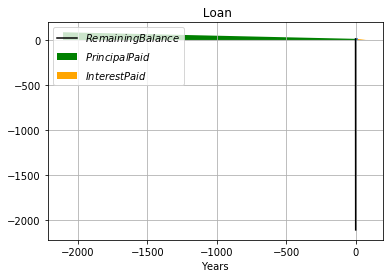

In [160]:
print("Month ", "Balance " , "    Principal", "    Interest ", "   Payment ")

for i in range(0, int(years + 1)):
    monthly_payment = monthly_payment_amount(principal, yearly_interest_rate, years)
    balance = remaining_balance(remaining, monthly_payment)
    monthly_interest = monthly_interest_amount(remaining,yearly_interest_rate)
    remaining_principal = monthly_principal(principal,monthly_payment, monthly_interest)
    remaining = remaining - remaining_principal

    print(i, '     $%.2f' %(remaining), '   $%.2f' %(remaining_principal), '     $%.2f' %(monthly_interest), '     $%.2f' %(monthly_payment))

    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.xlabel("Years")
    plt.title("%s Loan" %(user_input))    
    
    x = list(range(0, i))
    
    y_1 = (i, remaining)
    
    y_2 = (i, remaining_principal)
   
    y_3 = (i, monthly_interest)
    
    plt.grid()
    plt.plot(x)
    plt.plot(y_1,  c = 'black', ls="-", label="$Remaining Balance$")
    plt.fill_between(y_1, y_2, facecolor = 'green', label="$Principal Paid$")
    plt.fill_between(y_2, y_3, facecolor = 'orange', label="$Interest Paid$")
    plt.legend(loc = 2)
    